In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
businesses = pd.read_pickle('grouped_ca.p')

In [3]:
#cl2 = pd.read_csv("clustered_2.csv")
#cl3 = pd.read_csv("clustered_3.csv")
#cl4 = pd.read_csv("clustered_4.csv")
#cl = pd.read_csv("clustered.csv")
lex = pd.read_csv("Trafficking_Lexicon.csv").dropna().rename(columns={'Human Trafficking (weight 0-1-2)':'HT_Weight',
                                                                     "Test Weight (0-1-2)":"Sex_Weight"})
florida = pd.read_csv("florida_review_data.csv")
ht_dict = pd.Series(lex.HT_Weight.values, index=lex.TERM).to_dict()
sex_dict = pd.Series(lex.Sex_Weight.values, index=lex.TERM).to_dict()
florida['rubmaps'] = florida['rm_review_flag'].apply(lambda x: 0 if x=='N' else 1)
florida['yelp'] = florida['yelp_review_flag'].apply(lambda x: 0 if x=='N' else 1)

In [22]:
def make_histograms(df, features, cat):
    df_sub = df[features]
    # from matplotlib.pyplot import matplotlib
    df_arr = df_sub.to_numpy()
    fig,axes =plt.subplots(int(len(features) / 2),2, figsize=(24, 50)) 
    HT=df_arr[df[cat]==1]
    legit=df_arr[df[cat]==0]
    ax=axes.ravel()# flat axes with numpy ravel
    # switch to percentages
    for i in range(len(features)):
        _,bins=np.histogram(df_arr[:,i],bins=40, density=True)
        ax[i].hist(HT[:,i],bins=bins,color='r',alpha=.5, density=True)# red color for malignant class 
        ax[i].hist(legit[:,i],bins=bins,color='g',alpha=0.3, density=True)# alpha is           for transparency in the overlapped region 
        ax[i].set_title(df_sub.columns[i],fontsize=20)
        ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
        ax[i].set_yticks(())
    ax[0].legend(['HT','legit'],loc='best',fontsize=20)
    plt.tight_layout()# let's make good plots
    plt.show()

In [5]:
florida.columns

Index(['Count_of_owner_charges', 'County', 'HT_bi_0_count', 'HT_bi_0_score',
       'HT_bi_1_count', 'HT_bi_1_score', 'HT_bi_2_count', 'HT_bi_2_score',
       'HT_total_lexicon_score', 'HT_tri_0_count', 'HT_tri_0_score',
       'HT_tri_1_count', 'HT_tri_1_score', 'HT_tri_2_count', 'HT_tri_2_score',
       'HT_uni_0_count', 'HT_uni_0_score', 'HT_uni_1_count', 'HT_uni_1_score',
       'HT_uni_2_count', 'HT_uni_2_score', 'LMT_adervse_count',
       'MB_adverse_count', 'actual', 'clean_reviews', 'illicit_word_count',
       'lemm_reviews', 'mb_norm_id', 'norm_id', 'pred', 'prob',
       'rm_review_flag', 'sex_bi_0_count', 'sex_bi_0_score', 'sex_bi_1_count',
       'sex_bi_1_score', 'sex_bi_2_count', 'sex_bi_2_score',
       'sex_total_lexicon_score', 'sex_tri_0_count', 'sex_tri_0_score',
       'sex_tri_1_count', 'sex_tri_1_score', 'sex_tri_2_count',
       'sex_tri_2_score', 'sex_uni_0_count', 'sex_uni_0_score',
       'sex_uni_1_count', 'sex_uni_1_score', 'sex_uni_2_count',
       'sex_u

In [31]:
 grouped = fl_match.groupby(['norm_id']).agg({"yelp": "sum",
                                  "rubmaps":"sum", 
                                    'HT_total_lexicon_score':"max",
                                     'sex_total_lexicon_score':"max",
                                     'HT_bi_0_count':"max",
       'HT_bi_1_count':"max", 'HT_bi_2_count':"max", 'HT_tri_0_count':"max", 'HT_tri_1_count':"max",
       'HT_tri_2_count':"max", 'HT_uni_0_count':"max", 'HT_uni_1_count':"max", 'HT_uni_2_count':"max",
       'sex_bi_0_count':"max", 'sex_bi_1_count':"max", 'sex_bi_2_count':"max", 'sex_tri_0_count':"max",
       'sex_tri_1_count':"max", 'sex_tri_2_count':"max", 'sex_uni_0_count':"max",
       'sex_uni_1_count':"max", 'sex_uni_2_count':"max", 'actual':"max",'Count_of_owner_charges':'sum', 
       'County':'max', 
       'HT_total_lexicon_score':'max', 'LMT_adervse_count':'sum',
       'MB_adverse_count':'sum', 'illicit_word_count':'max', 
       'sex_total_lexicon_score':'max'})

In [14]:
features_ca = ['yelp', 'rubmaps', 'HT_uni_1_count', 'sex_bi_1_count', 
            'HT_uni_0_count', 'HT_bi_0_count', 'sex_uni_1_count', 'sex_uni_0_count']
features_fl = ['Count_of_owner_charges', 'County', 'HT_bi_0_count',
       'HT_bi_1_count', 'HT_bi_2_count',
       'HT_total_lexicon_score', 'HT_tri_0_count',
       'HT_tri_1_count', 'HT_tri_2_count',
       'HT_uni_0_count', 'HT_uni_1_count',
       'HT_uni_2_count', 'LMT_adervse_count',
       'MB_adverse_count', 'illicit_word_count', 'sex_bi_0_count', 
        'sex_bi_1_count', 'sex_bi_2_count',
       'sex_total_lexicon_score', 'sex_tri_0_count',
       'sex_tri_1_count', 'sex_tri_2_count', 'sex_uni_0_count',
       'sex_uni_1_count', 'sex_uni_2_count', 'rubmaps', 'yelp']

In [7]:
pd.set_option("display.max_columns", 100)

In [16]:
businesses['target'] = (businesses['pred'] >= 0.5).astype(int)

IndexError: index 26 is out of bounds for axis 0 with size 26

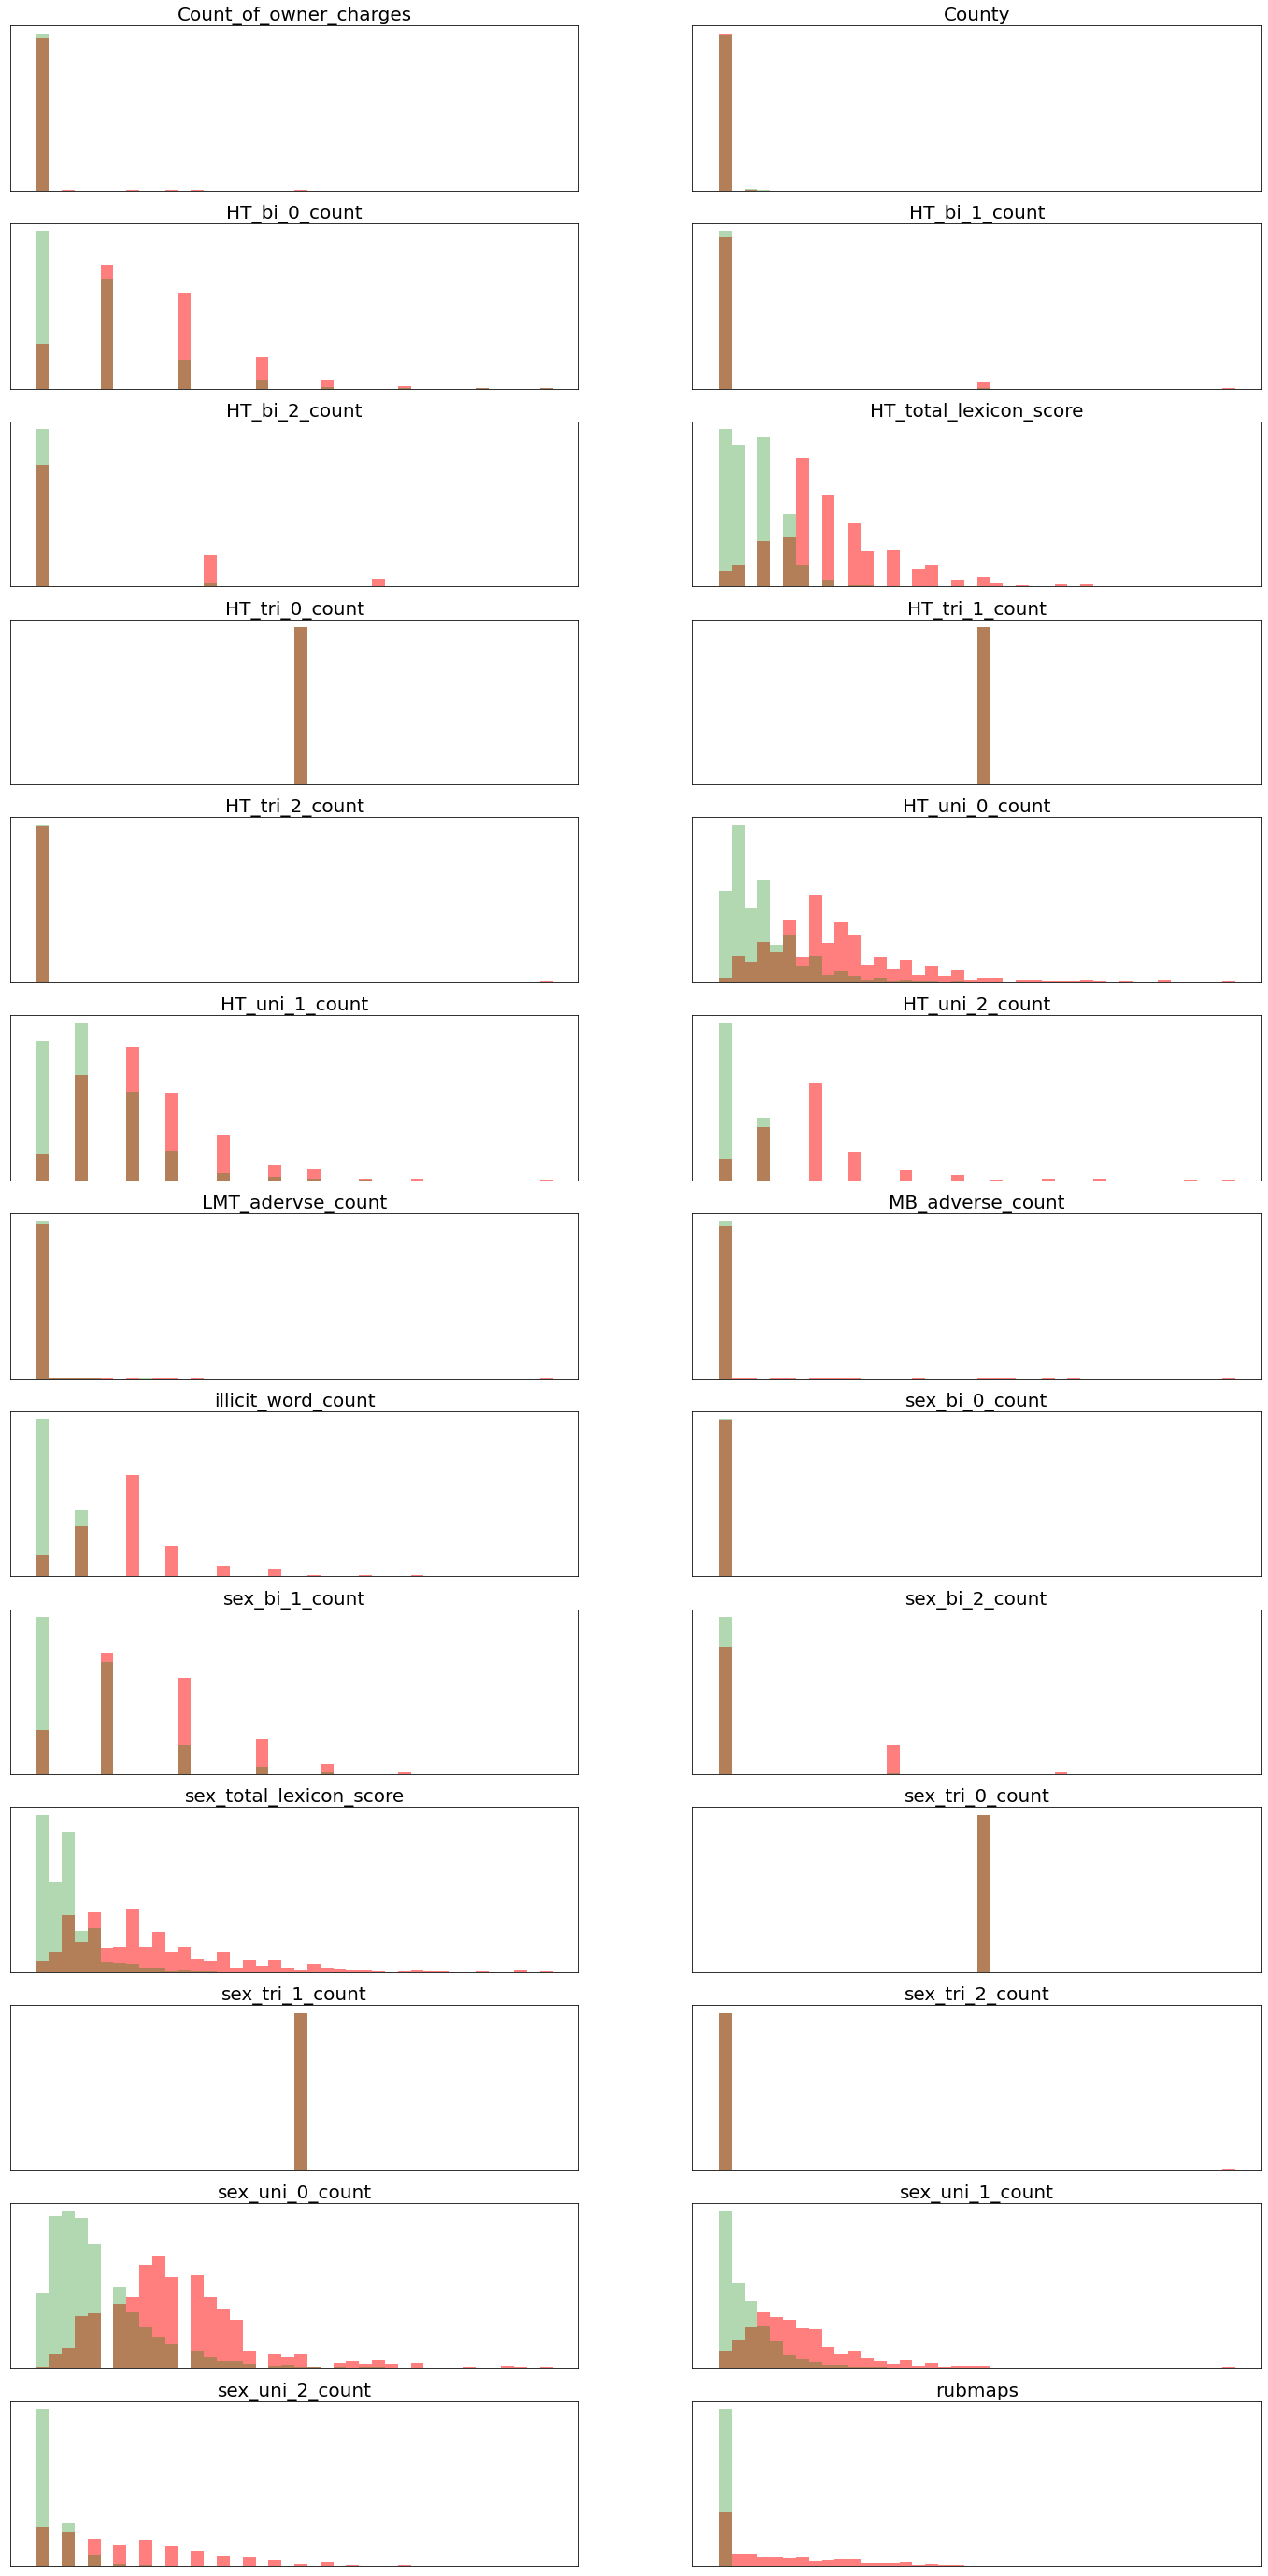

In [23]:
make_histograms(grouped, features_fl, 'actual')

In [26]:
grouped.describe()

,yelp,rubmaps,HT_total_lexicon_score,sex_total_lexicon_score,HT_bi_0_count,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,HT_tri_1_count,HT_tri_2_count,HT_uni_0_count,HT_uni_1_count,HT_uni_2_count,sex_bi_0_count,sex_bi_1_count,sex_bi_2_count,sex_tri_0_count,sex_tri_1_count,sex_tri_2_count,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,actual,Count_of_owner_charges,County,LMT_adervse_count,MB_adverse_count,illicit_word_count
count,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.0,3567.0,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.0,3567.0,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.000000,3567.00000,3567.000000,3567.000000
mean,8.172974,3.404542,2.224558,5.050182,0.827306,0.013176,0.077937,0.0,0.0,0.000841,6.950378,1.367536,0.624054,0.001962,0.842164,0.048780,0.0,0.0,0.000841,4.869358,3.438183,1.015139,0.200729,0.219232,53.898795,0.25792,0.200729,0.647883
std,8.100121,10.859001,2.364389,5.885523,0.947829,0.116478,0.309838,0.0,0.0,0.028993,6.349562,1.269068,1.002361,0.050199,0.955566,0.240065,0.0,0.0,0.028993,4.121035,3.388068,2.011547,0.400602,3.162214,182.469191,4.13976,2.964374,1.021055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,23.000000,0.00000,0.000000,0.000000
50%,5.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,46.000000,0.00000,0.000000,0.000000
75%,15.000000,0.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,9.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,7.000000,5.000000,1.000000,0.000000,0.000000,60.000000,0.00000,0.000000,1.000000
max,50.000000,140.000000,24.000000,57.000000,7.000000,2.000000,3.000000,0.0,0.0,1.000000,62.000000,11.000000,11.000000,2.000000,7.000000,3.000000,0.0,0.0,1.000000,33.000000,42.000000,20.000000,1.000000,88.000000,9915.000000,194.00000,88.000000,11.000000


In [27]:
businesses.describe()

,lat,lon,yelp,rubmaps,HT_bi_0_count,pred,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,HT_tri_1_count,HT_tri_2_count,HT_uni_0_count,HT_uni_1_count,HT_uni_2_count,sex_bi_0_count,sex_bi_1_count,sex_bi_2_count,sex_tri_0_count,sex_tri_1_count,sex_tri_2_count,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,range_days,num_names,num_addresses
count,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,33111.000000,41214.000000,41214.000000
mean,35.490832,-119.529521,16.936284,3.081332,1.628864,0.213903,0.140608,0.012617,0.292765,0.000146,0.000146,12.885815,1.656524,0.887344,1.030402,0.442398,0.075824,0.094070,0.050905,0.023681,9.964333,4.833940,0.995633,1515.694543,1.394332,1.282695
std,2.087205,2.035863,18.516588,12.725323,1.453249,0.339827,0.356034,0.115882,0.607492,0.012065,0.012065,9.150901,1.259827,0.982411,0.912801,0.690865,0.411363,0.312484,0.256297,0.222641,6.762384,3.911225,1.859496,1078.439799,1.170983,0.950544
min,30.527960,-124.264400,0.000000,0.000000,0.000000,-0.276075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,33.877098,-121.869118,2.000000,0.000000,1.000000,0.054029,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,616.000000,1.000000,1.000000
50%,34.173160,-118.451750,20.000000,0.000000,1.000000,0.081906,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,0.000000,1337.000000,1.000000,1.000000
75%,37.692045,-117.921100,20.000000,0.000000,2.000000,0.130429,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.000000,6.000000,1.000000,2247.000000,1.000000,1.000000
max,45.503750,-73.569470,609.000000,358.000000,17.000000,1.805782,4.000000,3.000000,10.000000,1.000000,1.000000,110.000000,17.000000,21.000000,9.000000,12.000000,12.000000,4.000000,5.000000,9.000000,79.000000,55.000000,28.000000,5332.000000,42.000000,38.000000


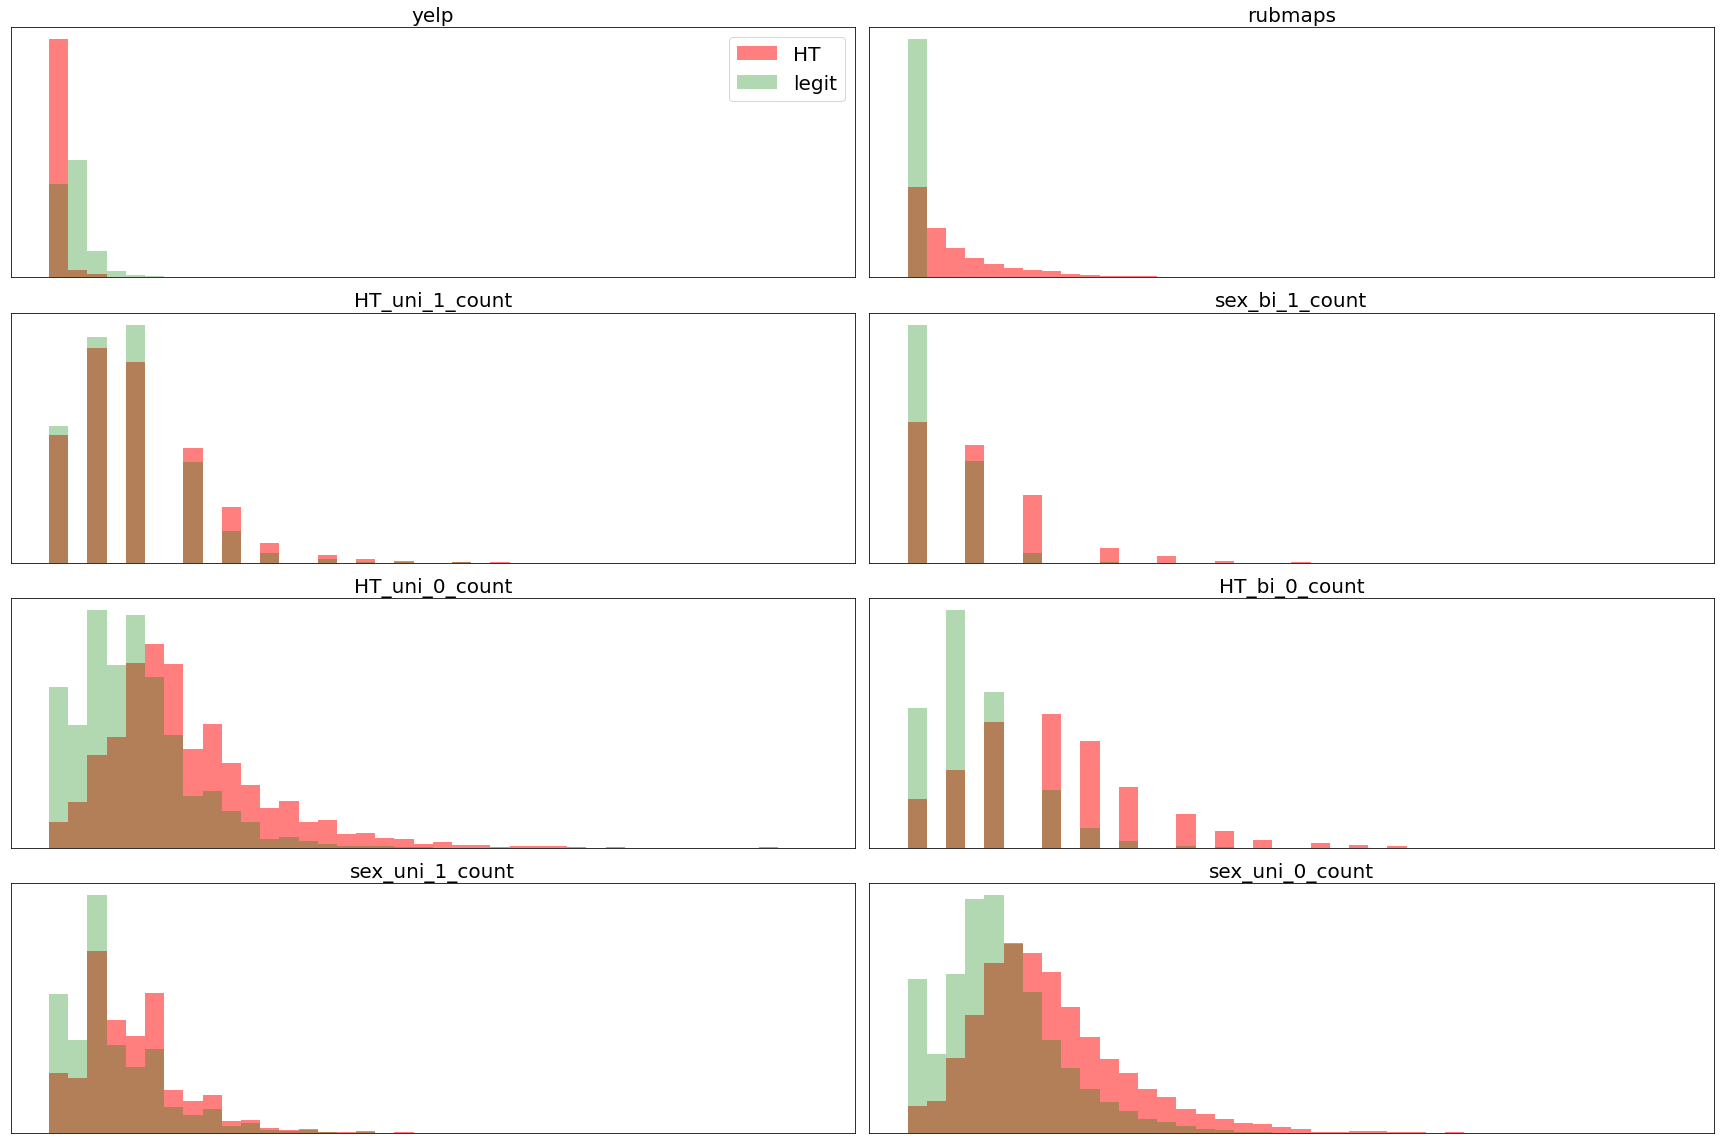

In [21]:
make_histograms(businesses, features, 'target')

In [8]:
fl_match = florida.drop(['clean_reviews',
       'lemm_reviews', 'mb_norm_id', 'pred', 'prob',
       'target', 'target_mb_adv', 'target_rm',
       'target_yelp'], axis=1)

In [5]:
fl_match['yelp'] = fl_match['yelp_review_flag'].apply(lambda x: 0 if x == 'N' else 1)
fl_match['rubmaps'] = fl_match['rm_review_flag'].apply(lambda x: 0 if x == 'N' else 1)
fl_match = fl_match.drop(['yelp_review_flag', 'rm_review_flag'], axis=1) 

In [9]:
 grouped = fl_match.groupby(['norm_id']).agg({"yelp": "sum",
                                  "rubmaps":"sum", 
                                    'HT_total_lexicon_score':"max",
                                     'sex_total_lexicon_score':"max",
                                     'HT_bi_0_count':"max",
       'HT_bi_1_count':"max", 'HT_bi_2_count':"max", 'HT_tri_0_count':"max", 'HT_tri_1_count':"max",
       'HT_tri_2_count':"max", 'HT_uni_0_count':"max", 'HT_uni_1_count':"max", 'HT_uni_2_count':"max",
       'sex_bi_0_count':"max", 'sex_bi_1_count':"max", 'sex_bi_2_count':"max", 'sex_tri_0_count':"max",
       'sex_tri_1_count':"max", 'sex_tri_2_count':"max", 'sex_uni_0_count':"max",
       'sex_uni_1_count':"max", 'sex_uni_2_count':"max", 'actual':"max",'Count_of_owner_charges':'sum', 
       'County':'max', 
       'HT_total_lexicon_score':'max', 'LMT_adervse_count':'sum',
       'MB_adverse_count':'sum', 'illicit_word_count':'max', 
       'sex_total_lexicon_score':'max'})


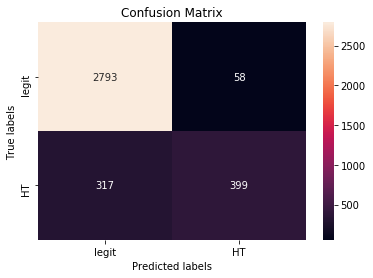

In [8]:
#Cluster 1 is HT
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=grouped['actual'],y_pred=grouped['cluster'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['legit', 'HT']); 
ax.yaxis.set_ticklabels(['legit', 'HT']);

In [9]:
cm

array([[2793,   58],
       [ 317,  399]], dtype=int64)

In [9]:
cl2[cl2.cluster_0 == 1].describe()

,g_id,lat,lon,yelp,rubmaps,HT_total_lexicon_score,sex_total_lexicon_score,HT_bi_0_count,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,HT_tri_1_count,HT_tri_2_count,HT_uni_0_count,HT_uni_1_count,HT_uni_2_count,sex_bi_0_count,sex_bi_1_count,sex_bi_2_count,sex_tri_0_count,sex_tri_1_count,sex_tri_2_count,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,bi_count,tri_count,sex_bi_score,sex_tri_score,HT_bi_score,HT_tri_score,num_names,num_addresses,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.0,670.0,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.0,670.0,670.0,670.0,670.0,670.0,670.0
mean,19180.792537,35.291970,-119.341333,15.717910,38.711940,1.423881,7.376119,0.922388,0.011940,0.004478,0.114925,0.0,0.0,5.043284,0.508955,0.555224,0.231343,0.252239,0.274627,0.065672,0.007463,0.035821,1.879104,2.531343,3.104478,1.043284,0.119403,1.141791,0.082090,0.101493,0.002985,1.759701,1.622388,1.0,1.0,1.0,1.0,1.0,1.0,0.0
std,11572.522915,1.992413,1.981009,36.054511,48.913722,2.400678,6.086474,0.419916,0.144166,0.066815,0.609038,0.0,0.0,3.128954,0.757076,1.216145,0.432502,0.444820,0.488230,0.559081,0.128010,0.208706,1.249937,1.881720,3.024239,0.283436,0.611851,0.929125,0.438241,0.411164,0.077267,2.309502,2.036830,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,92.000000,32.615920,-122.869800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0
25%,9100.500000,33.831627,-121.799917,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0
50%,17350.500000,34.100105,-118.328780,0.000000,24.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0
75%,28543.000000,37.386588,-117.901650,20.000000,61.000000,2.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,6.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,5.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0
max,40891.000000,40.566160,-116.058400,427.000000,358.000000,34.000000,35.000000,3.000000,3.000000,1.000000,13.000000,0.0,0.0,24.000000,11.000000,17.000000,2.000000,2.000000,3.000000,13.000000,3.000000,2.000000,15.000000,18.000000,16.000000,3.000000,13.000000,6.000000,4.000000,3.000000,2.000000,28.000000,27.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [35]:
imbs = cl2[cl2.cluster_0 == 1]
features = ['yelp', 'rubmaps',
       'HT_total_lexicon_score', 'sex_total_lexicon_score', 'HT_bi_0_count',
       'HT_bi_1_count', 'HT_bi_2_count', 'HT_tri_0_count', 'HT_tri_1_count',
       'HT_tri_2_count', 'HT_uni_0_count', 'HT_uni_1_count', 'HT_uni_2_count',
       'sex_bi_0_count', 'sex_bi_1_count', 'sex_bi_2_count', 'sex_tri_0_count',
       'sex_tri_1_count', 'sex_tri_2_count', 'sex_uni_0_count',
       'sex_uni_1_count', 'sex_uni_2_count', 'bi_count', 'tri_count',
       'sex_bi_score', 'sex_tri_score', 'HT_bi_score', 'HT_tri_score',
        'num_names', 'num_addresses']

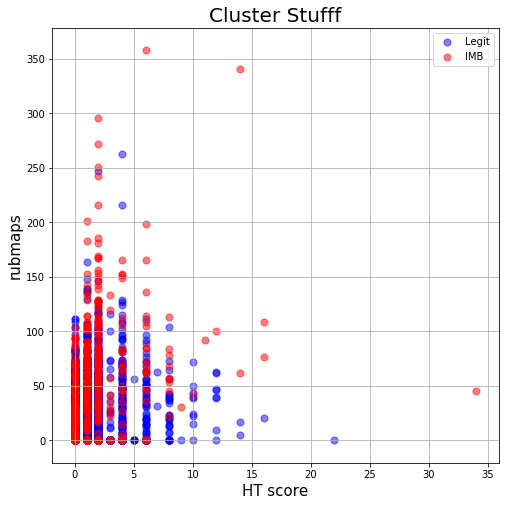

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('HT score', fontsize = 15)
ax.set_ylabel('rubmaps', fontsize = 15)
ax.set_title('Cluster Stufff', fontsize = 20)
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = cl2['cluster_0'] == target
    ax.scatter(cl2.loc[indicesToKeep, 'HT_total_lexicon_score']
               , cl2.loc[indicesToKeep, 'rubmaps']
               , c = color
               , s = 50
               , alpha = 0.5)
ax.legend(["Legit", "IMB"])
ax.grid()

In [36]:
x = cl2.drop(2020, axis=0).loc[:, features].values
y = cl2.drop(2020, axis=0).loc[:, ['cluster_0']].values
x = StandardScaler().fit_transform(x)

In [41]:
# Look into the explained variance once we drop the mega outlier
# Make sure we have a story for Sherrie. Cant just show her some random shit

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, cl2[['cluster_0']]], axis = 1)#.drop(2020, axis=0)
sum(pca.explained_variance_ratio_)

0.3273372538372134

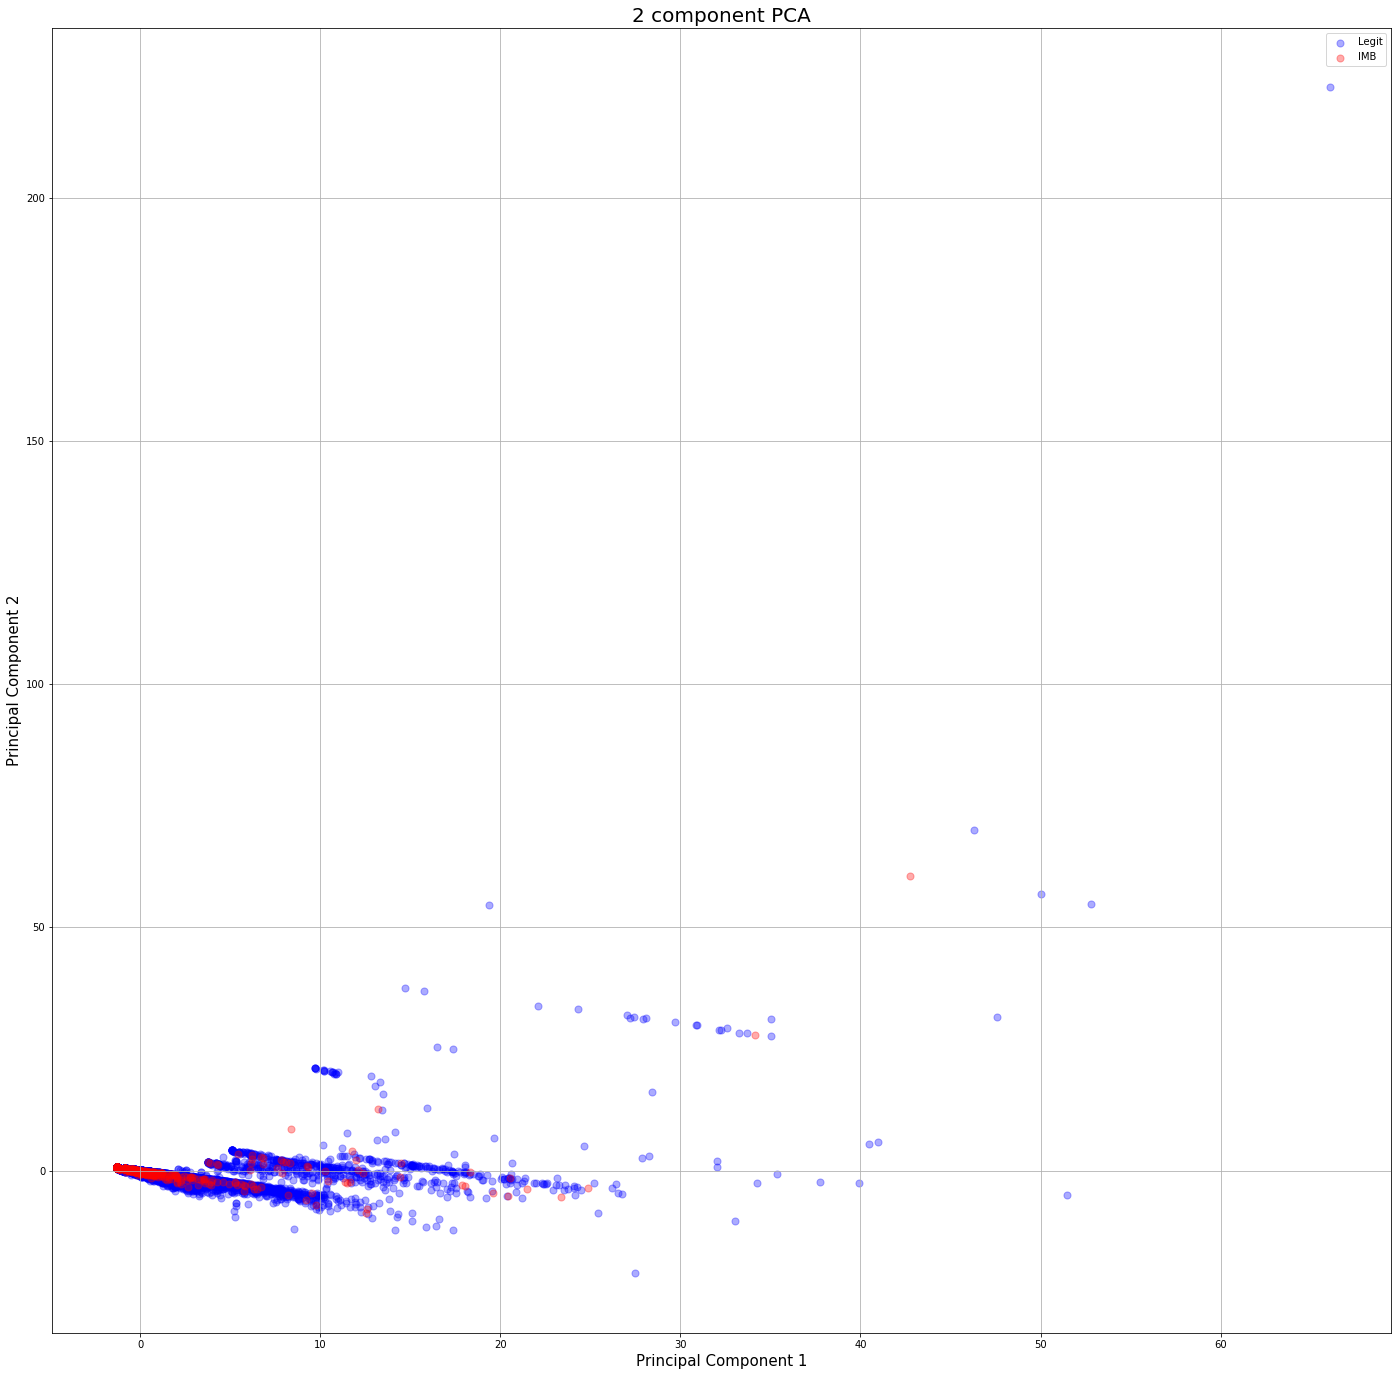

In [50]:
fig = plt.figure(figsize = (24,24))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster_0'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               , alpha = 0.33)
ax.legend(["Legit", "IMB"])
#ax.set_ylim(bottom=-10, top=5)
#ax.set_xlim(left=-1, right=2)
ax.grid()

In [51]:
x2 = cl2.drop(2020, axis=0).loc[:, features].values
y2 = cl2.drop(2020, axis=0).loc[:, ['cluster_0']].values
x2 = StandardScaler().fit_transform(x2)

In [52]:
# Look into the explained variance once we drop the mega outlier
# Make sure we have a story for Sherrie. Cant just show her some random shit

pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(x2)
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2'])
finalDf2 = pd.concat([principalDf2, cl2[['cluster_0']]], axis = 1).drop(2020, axis=0)

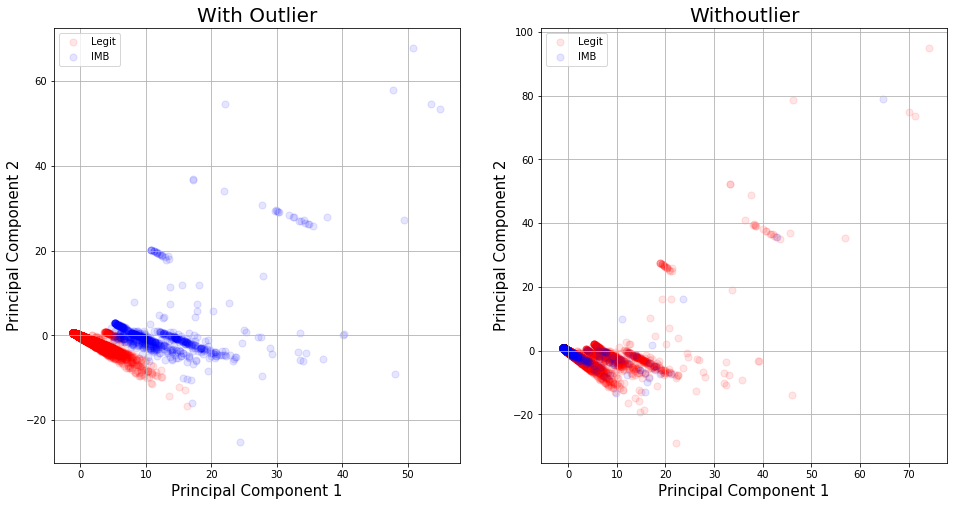

In [60]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (16,8))
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('With Outlier', fontsize = 20)
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('Withoutlier', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster_0'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               , alpha = 0.1)
    ax2.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50
               , alpha = 0.1)
ax.legend(["Legit", "IMB"])
ax.grid()
ax2.legend(["Legit", "IMB"])
ax2.grid()

0.41332586204176175

In [9]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.013052,0.278309,0.171931,0.325668,0.306734,0.057413,0.020316,0.155860,1.617992e-23,-1.107207e-24,0.273693,0.119410,0.146908,0.113071,0.158582,0.257564,0.095420,0.048718,0.160281,0.148754,0.225448,0.286397,0.314143,0.157327,0.315625,0.169664,0.073253,0.017051
1,-0.006536,-0.118869,-0.191777,-0.226849,0.065406,0.000616,-0.011655,0.466779,5.497200e-22,3.439367e-21,-0.185538,-0.122047,-0.159126,0.119640,-0.015982,0.048261,0.396321,0.104670,0.235600,-0.081745,-0.213887,-0.148895,0.048305,0.466076,0.013315,0.255831,-0.018777,0.008981


In [10]:
max(abs(pd.DataFrame(pca.components_).iloc[0]))

0.32566825435395763

In [11]:
max(abs(pd.DataFrame(pca.components_).iloc[1]))

0.4667785245312779

The above components correspond to the features HT_total_lexicon_score and HT_bi_2_count respectively

In [12]:
finalDf[finalDf['principal component 1'] > 70]

,principal component 1,principal component 2,cluster_0


In [13]:
standDf = pd.DataFrame(x, columns = features)

In [82]:
standDf.iloc[2020]

yelp                         0.497854
rubmaps                     -0.241912
HT_total_lexicon_score      -0.273763
sex_total_lexicon_score      0.897342
HT_bi_0_count                6.826535
HT_bi_1_count               -0.009555
HT_bi_2_count               -0.008524
HT_tri_0_count             166.093260
HT_tri_1_count               0.000000
HT_tri_2_count               0.000000
HT_uni_0_count               6.954687
HT_uni_1_count              -0.275055
HT_uni_2_count              -0.173037
sex_bi_0_count              14.906495
sex_bi_1_count              -0.060557
sex_bi_2_count              -0.062610
sex_tri_0_count            182.289261
sex_tri_1_count             -0.004921
sex_tri_2_count             -0.021569
sex_uni_0_count             10.329837
sex_uni_1_count              0.641618
sex_uni_2_count              0.551209
bi_count                     6.252174
tri_count                  165.119266
sex_bi_score                -0.098102
sex_tri_score               -0.022795
HT_bi_score 

In [92]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-0.013051,0.278309,0.171931,0.325668,0.306734,0.057413,0.020317,0.155860,8.983033e-23,-5.078722e-23,0.273693,0.119410,0.146908,0.113071,0.158582,0.257565,0.09542,0.048718,0.160280,0.148754,0.225448,0.286397,0.314143,0.157327,0.315625,0.169664,0.073253,0.017051
1,-0.006536,-0.118874,-0.191778,-0.226845,0.065408,0.000618,-0.011656,0.466778,-3.301860e-21,-3.387472e-22,-0.185536,-0.122062,-0.159119,0.119643,-0.015981,0.048259,0.39632,0.104668,0.235602,-0.081754,-0.213878,-0.148898,0.048306,0.466076,0.013314,0.255832,-0.018778,0.008978


In [97]:
cl2.iloc[2020]

g_id                                                            2019
lat                                                          32.8278
lon                                                         -117.147
yelp                                                               2
rubmaps                                                            0
name                       ['Ana’s Hair Design', 'Dina’s Skin Care']
address                               ['8340 Vickers St, CA, 92111']
HT_total_lexicon_score                                             0
sex_total_lexicon_score                                            4
HT_bi_0_count                                                      1
HT_bi_1_count                                                      0
HT_bi_2_count                                                      0
HT_tri_0_count                                                    13
HT_tri_1_count                                                     0
HT_tri_2_count                    

In [ ]:
reviews = pd.read_pickle('concat.p')

In [104]:
reviews[reviews['lon'] == -117.147]

,name,address,review,lat,lon,yelp,rubmaps,lat_lon
2619,Eti Domb,"4054 Centre St Ste 1, CA, 92103",Eti is an amazing acupuncturist. She helped m...,32.75168,-117.147,1,0,"(32.75168, -117.147)"
4863,"Mateo Silva, HHP","4054 Centre St, CA, 92103",NaN,32.75168,-117.147,1,0,"(32.75168, -117.147)"
14101,White Lotus Acupuncture and Massage,"4054 Centre St, CA, 92103","I was very nervous to try acupuncture, but Des...",32.75168,-117.147,1,0,"(32.75168, -117.147)"
15281,Ana’s Hair Design,"8340 Vickers St, CA, 92111",Ana is the best. I've been coming to her for o...,32.82776,-117.147,1,0,"(32.82776, -117.147)"
26495,Dina’s Skin Care,"8340 Vickers St, CA, 92111",I have had facials from high end luxury spas t...,32.82776,-117.147,1,0,"(32.82776, -117.147)"
29647,Body Asylum-A Dermalogica Salon,"8305 Vickers St Ste 208, CA, 92111",Love the Body Asylum - Sharyn is extremely kno...,32.82699,-117.147,1,0,"(32.82699, -117.147)"
31632,China Mystique,"7968 Arjons Dr, CA, 92126",NaN,32.89532,-117.147,1,0,"(32.89532, -117.147)"
37872,Gel Nail & Accessories HANA,"8305 Vickers St. Ste 112, CA, 92111",Glad I found HANA on yelp. This was my first t...,32.82699,-117.147,1,0,"(32.82699, -117.147)"


In [109]:
for word in reviews.iloc[26495]['review'].split(' '):
    if word in ht_dict.keys():
        print(word)

60min
Asian
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
WTF
BB


In [19]:
cl2[cl2.cluster_0 == 0].describe()

,g_id,lat,lon,yelp,rubmaps,HT_total_lexicon_score,sex_total_lexicon_score,HT_bi_0_count,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,HT_tri_1_count,HT_tri_2_count,HT_uni_0_count,HT_uni_1_count,HT_uni_2_count,sex_bi_0_count,sex_bi_1_count,sex_bi_2_count,sex_tri_0_count,sex_tri_1_count,sex_tri_2_count,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,bi_count,tri_count,sex_bi_score,sex_tri_score,HT_bi_score,HT_tri_score,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
count,40634.000000,40514.000000,40626.000000,40634.000000,40634.000000,40634.000000,40634.000000,40634.000000,40634.0,40634.0,40634.0,40634.0,40634.0,40634.000000,40634.000000,40634.000000,40634.0,40634.0,40634.0,40634.0,40634.0,40634.0,40634.000000,40634.000000,40634.000000,40634.000000,40634.0,40634.000000,40634.0,40634.0,40634.0,40634.0,40634.0,40634.0,40634.0,40634.0,40634.0,40634.0
mean,20666.016243,35.493386,-119.533602,1.342521,2.506177,0.306935,1.388394,0.001821,0.0,0.0,0.0,0.0,0.0,1.708520,0.147832,0.083969,0.0,0.0,0.0,0.0,0.0,0.0,0.910100,0.878107,0.322169,0.002387,0.0,0.000098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,11922.194567,2.087709,2.023998,1.297489,10.267014,1.107958,2.546099,0.042636,0.0,0.0,0.0,0.0,0.0,2.236567,0.549586,0.484939,0.0,0.0,0.0,0.0,0.0,0.0,1.336469,1.646012,1.014592,0.049303,0.0,0.009921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.000000,30.527960,-124.264400,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,10356.250000,33.879078,-121.872030,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,20688.500000,34.175550,-118.453600,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,30992.750000,37.693640,-117.921400,2.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,41287.000000,41.800260,-99.852900,43.000000,263.000000,40.000000,44.000000,1.000000,0.0,0.0,0.0,0.0,0.0,46.000000,16.000000,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,30.000000,44.000000,19.000000,2.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
imbs.describe()

,g_id,lat,lon,yelp,rubmaps,HT_total_lexicon_score,sex_total_lexicon_score,HT_bi_0_count,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,HT_tri_1_count,HT_tri_2_count,HT_uni_0_count,HT_uni_1_count,HT_uni_2_count,sex_bi_0_count,sex_bi_1_count,sex_bi_2_count,sex_tri_0_count,sex_tri_1_count,sex_tri_2_count,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,bi_count,tri_count,sex_bi_score,sex_tri_score,HT_bi_score,HT_tri_score,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
count,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.0,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.0,655.0,655.0,655.0,655.0,655.0,655.0
mean,19215.149618,35.299022,-119.334481,1.123664,38.409160,1.563359,8.149618,0.970992,0.010687,0.004580,0.11145,0.0,0.0,6.103817,0.555725,0.596947,0.242748,0.267176,0.280916,0.064122,0.00458,0.036641,2.380153,3.030534,3.204580,1.105344,0.116031,1.178626,0.080916,0.103817,0.003053,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,11655.566581,2.008325,1.971347,2.575165,48.845765,3.489416,6.626485,0.519422,0.140582,0.067573,0.61189,0.0,0.0,3.694144,0.968712,1.737161,0.473136,0.488780,0.492002,0.563012,0.11722,0.211014,1.991704,2.924480,3.298268,0.448803,0.614779,0.970593,0.440169,0.433569,0.078146,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,92.000000,32.615920,-122.869800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,9068.000000,33.831240,-121.727950,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.0,0.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,17451.000000,34.102860,-118.344370,0.000000,24.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.00000,0.0,0.0,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,2.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,28771.000000,37.426940,-117.903200,1.000000,60.000000,2.000000,12.000000,1.000000,0.000000,0.000000,0.00000,0.0,0.0,7.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,3.000000,4.000000,5.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,40847.000000,40.566160,-116.058400,29.000000,358.000000,62.000000,60.000000,5.000000,3.000000,1.000000,13.00000,0.0,0.0,31.000000,10.000000,31.000000,3.000000,3.000000,3.000000,13.000000,3.00000,2.000000,17.000000,31.000000,30.000000,5.000000,13.000000,6.000000,4.000000,4.000000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
cl.head()

,g_id,lat,lon,yelp,rubmaps,name,address,HT_total_lexicon_score,sex_total_lexicon_score,HT_bi_0_count,HT_bi_1_count,HT_bi_2_count,HT_tri_0_count,HT_tri_1_count,HT_tri_2_count,HT_uni_0_count,HT_uni_1_count,HT_uni_2_count,sex_bi_0_count,sex_bi_1_count,sex_bi_2_count,sex_tri_0_count,sex_tri_1_count,sex_tri_2_count,sex_uni_0_count,sex_uni_1_count,sex_uni_2_count,bi_count,tri_count,sex_bi_score,sex_tri_score,HT_bi_score,HT_tri_score,range_days,num_names,num_addresses
0,-1,45.50375,-73.56947,1,0,['Hands2home Mobile Massage'],"['Mobile, CA']",0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,NaN,1,1
1,0,30.52796,-99.85290,1,0,['Angel Touch Therapeutic Massage'],"['Between I-10 And 210 Fwy, CA, n']",0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,NaN,1,1
2,1,31.02507,-114.84080,1,0,['Massage Therapy & Prenatal'],"['San felipe & Yerba Buena Road, CA, 95121']",0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,NaN,1,1
3,2,32.54368,-117.04650,20,0,['Ulta Beauty'],"['3951 Camino De La Plz Plaza at the Border, C...",0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0,0,972.0,1,1
4,3,32.54396,-117.03750,20,0,['Amerinails'],"['4509 Camino De La Plz Ste 364, CA, 92173']",0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,443.0,1,1


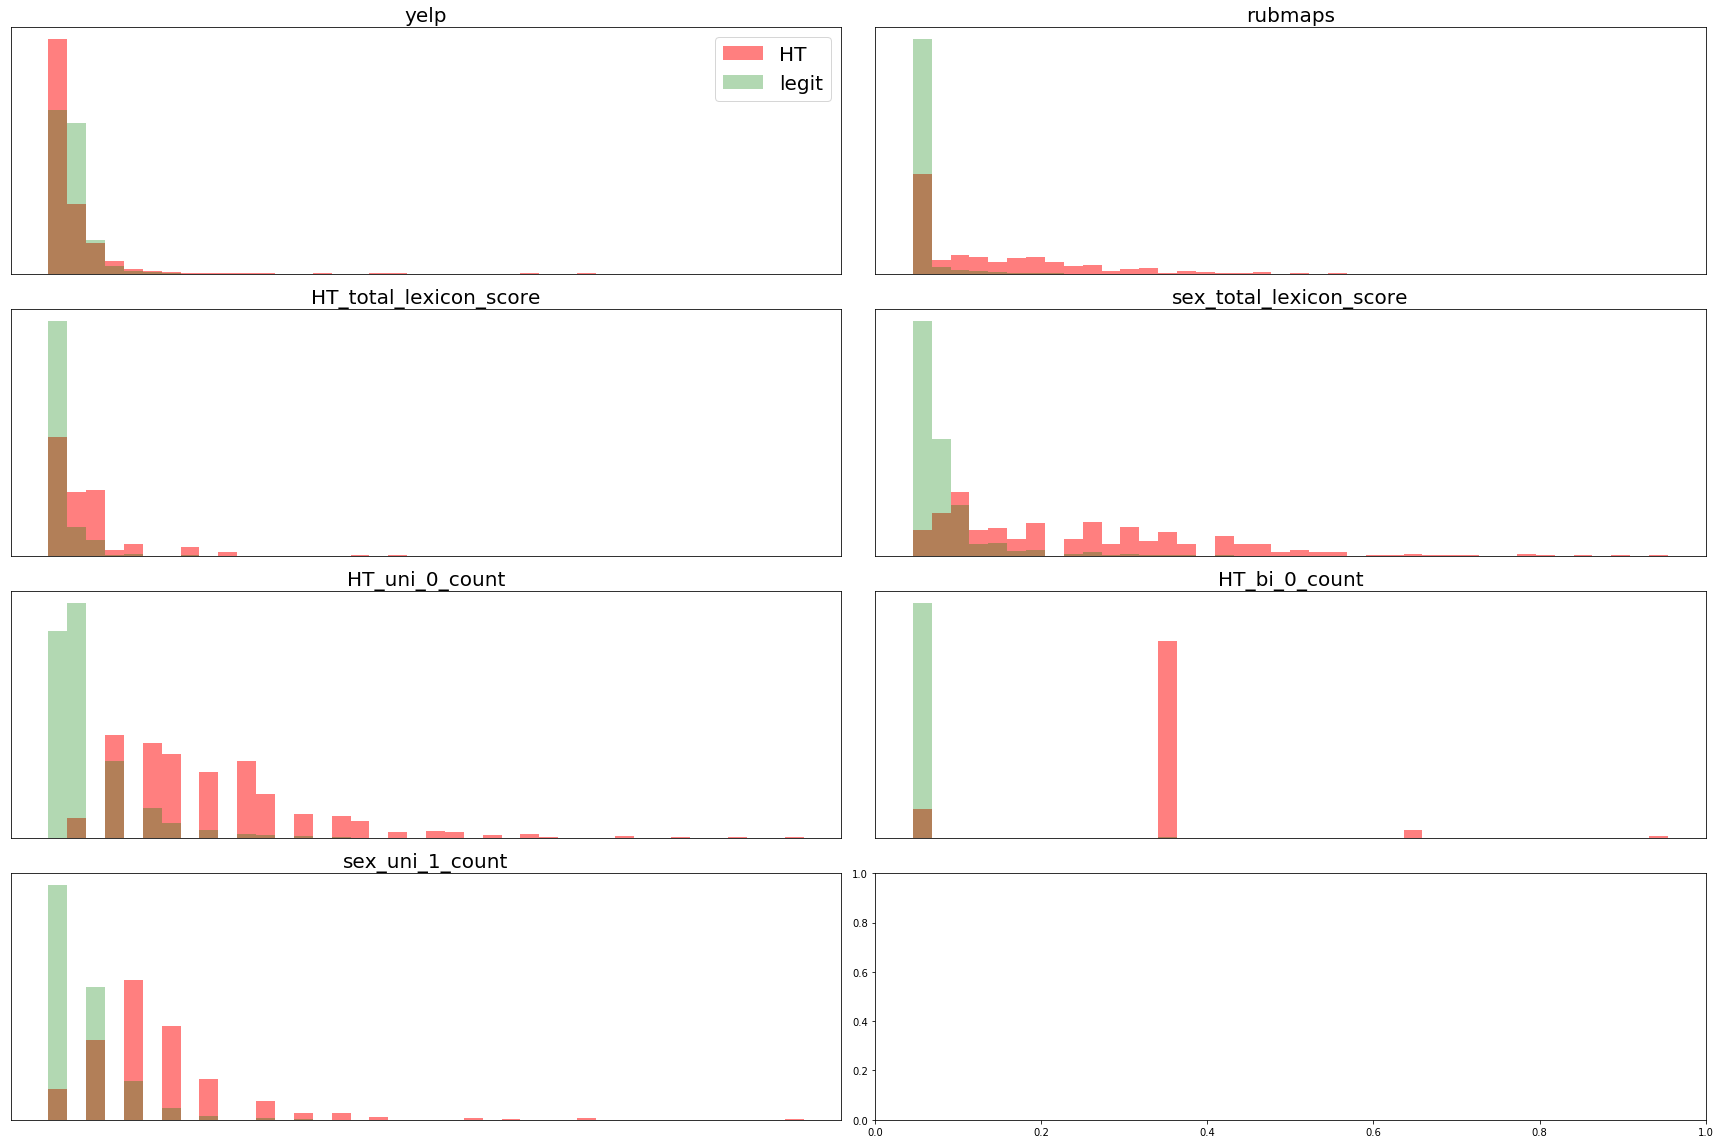

In [18]:
features = ['yelp', 'rubmaps', 'HT_total_lexicon_score', 'sex_total_lexicon_score', 
            'HT_uni_0_count', 'HT_bi_0_count', 'sex_uni_1_count', 'sex_uni_0_count']



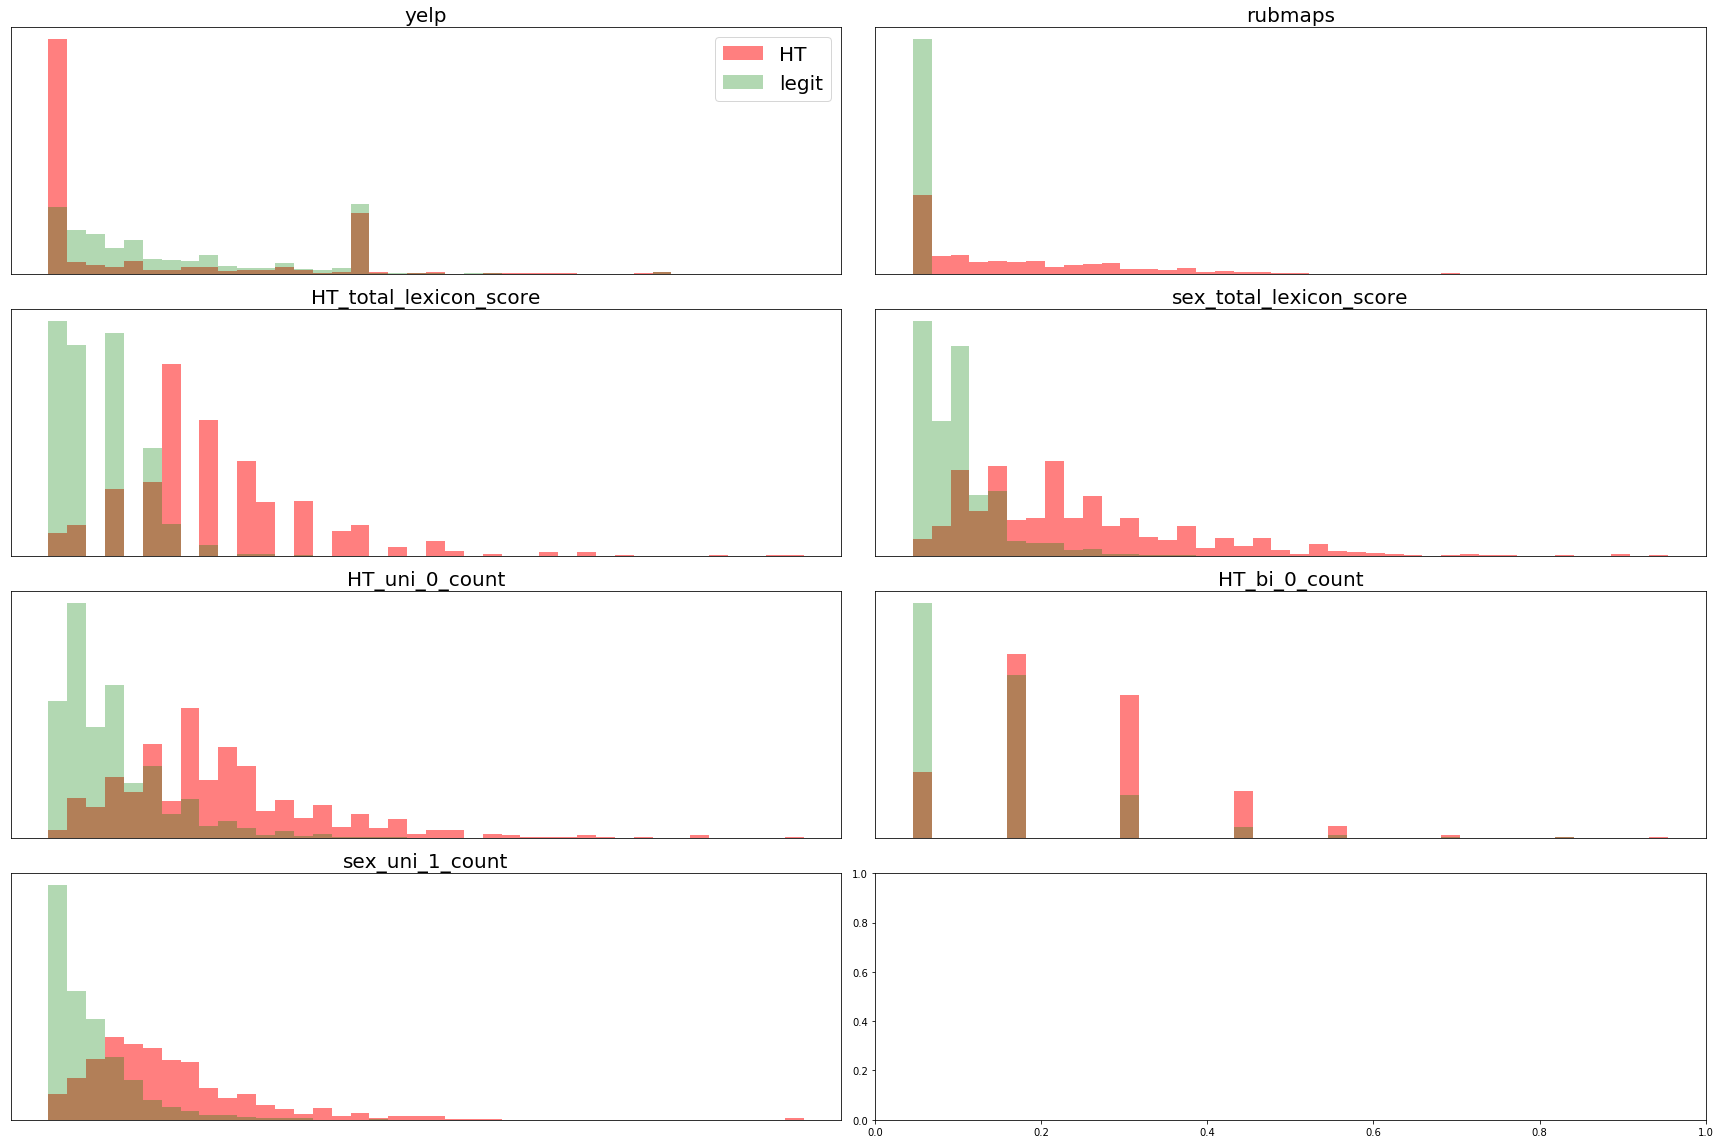

In [11]:
features = ['yelp', 'rubmaps', 'HT_total_lexicon_score', 'sex_total_lexicon_score', 
            'HT_uni_0_count', 'HT_bi_0_count', 'sex_uni_1_count', 'sex_uni_0_count',]
cl_sub = grouped[features]
# from matplotlib.pyplot import matplotlib
cl_arr = cl_sub.to_numpy()
fig,axes =plt.subplots(4,2, figsize=(24, 16)) # 3 columns each containing 10 figures, total 30 features
HT=cl_arr[grouped.actual==1]
legit=cl_arr[grouped.actual==0]
ax=axes.ravel()# flat axes with numpy ravel
# switch to percentages
for i in range(7):
    _,bins=np.histogram(cl_arr[:,i],bins=40, density=True)
    ax[i].hist(HT[:,i],bins=bins,color='r',alpha=.5, density=True)# red color for malignant class 
    ax[i].hist(legit[:,i],bins=bins,color='g',alpha=0.3, density=True)# alpha is           for transparency in the overlapped region 
    ax[i].set_title(cl_sub.columns[i],fontsize=20)
    ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
    ax[i].set_yticks(())
ax[0].legend(['HT','legit'],loc='best',fontsize=20)
plt.tight_layout()# let's make good plots
plt.show()